In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.optim as optim
import math

In [ ]:
weight = 0.4
bias = 0.5
X = torch.linspace(-20,20,300).unsqueeze(dim=1)
z = weight * X + bias

In [ ]:
def plot_graph(x_train, y_train, x_test=None, y_test=None, prediction=None):
  plt.plot(x_train, y_train)
  if x_test is not None and y_test is not None:
    plt.plot(x_test, y_test)
  if prediction is not None:
    plt.plot(x_test, prediction)
  plt.show()

In [ ]:
sigmoid = nn.Sigmoid()

In [ ]:
y = sigmoid(z)

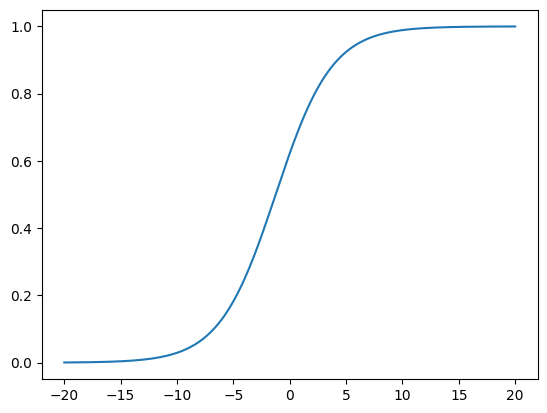

In [ ]:
plot_graph(X.numpy(), y.numpy())

In [ ]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(X)):]

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True))
    def forward(self, x:torch.Tensor):
        z= self.weights * x + self.bias
        y = sigmoid(z)
        return y


In [ ]:
#torch.manual_seed(42)
model = LogisticRegression()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=0.01)
loss_fn = nn.BCELoss()

In [ ]:
epochs = 3000

model.train()
for epoch in range(epochs):
  y_pred = model(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"epoch: {epoch} loss: {loss}")
with torch.inference_mode():
  y_pred = model(x_test)
  test_loss = loss_fn(y_pred,y_test)


In [ ]:
print(f"test loss: {test_loss}")
print(f"Accuracy: {1 - test_loss}")

test loss: 0.010529928840696812
Accuracy: 0.9894700646400452


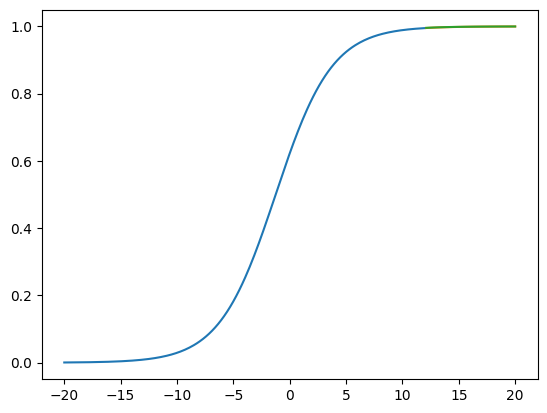

In [ ]:
plot_graph(x_train, y_train, x_test.numpy(), y_test.numpy(), y_pred.numpy())